In [1]:
# Import basic libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Wholesale customers dataset

df = pd.read_excel('Wholesale customers data.xlsx')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Provides information about the data (Here No null values present)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Display statistical measures

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Display shape of the dataset

df.shape

(440, 8)

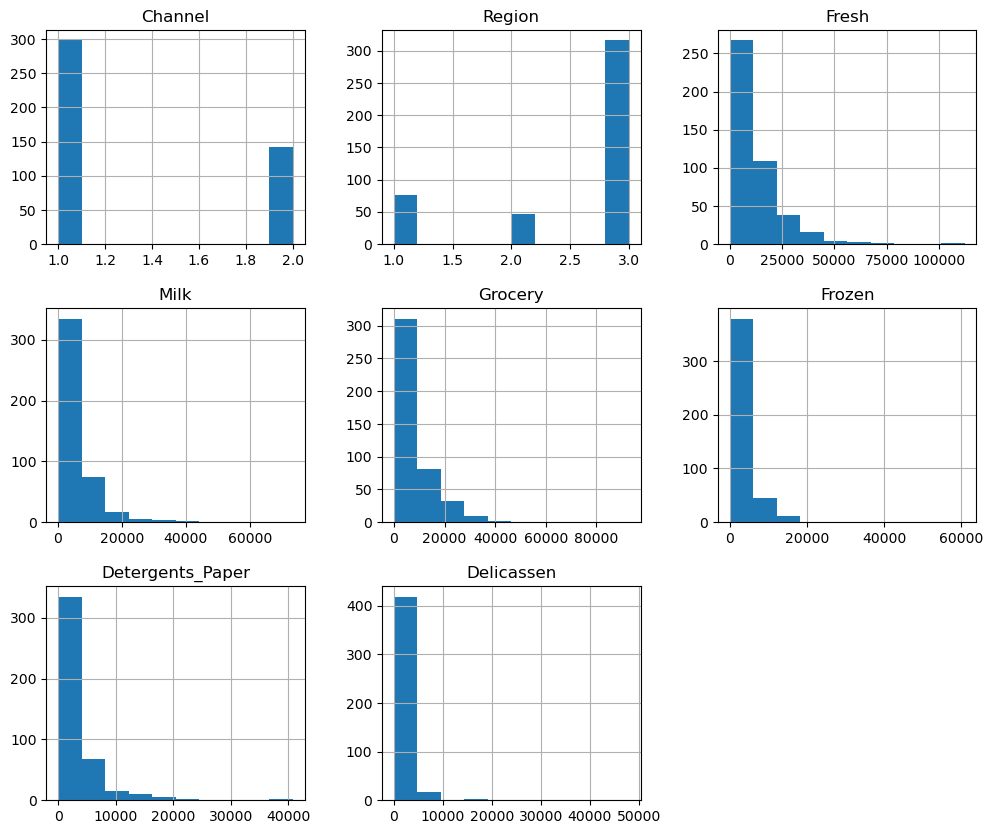

In [6]:
# Displaying the features in Histogram

df.hist(figsize=(12,10));

In the above histogram, as per the analysis most of the features such as Fresh, Milk, Grocery, Frozen, Detergent_Paper and Delicassen are skewed left of we can say it's is negatively skewed

[Text(0, 0, 'Channel'),
 Text(1, 0, 'Region'),
 Text(2, 0, 'Fresh'),
 Text(3, 0, 'Milk'),
 Text(4, 0, 'Grocery'),
 Text(5, 0, 'Frozen'),
 Text(6, 0, 'Detergents_Paper'),
 Text(7, 0, 'Delicassen')]

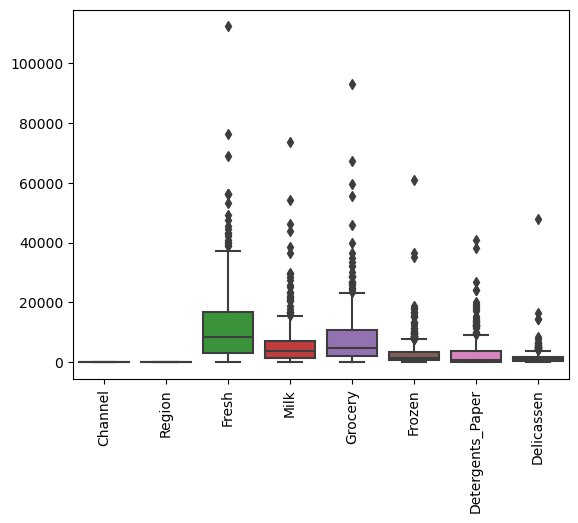

In [7]:
# Displaying Boxplot

ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

As per the boxplot analysis, there are many outliers for the features such as Fresh, Milk, Grocery, Frozen, Detergent_Paper and Delicassen. It suggests the presence of values that significantly deviate from the overall distribution of the variable.

## Feature Scaling

Text(0.5, 1.0, 'MinMax Scaled Distribution')

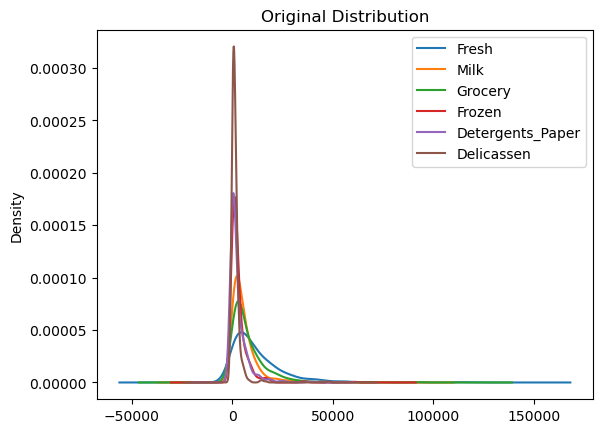

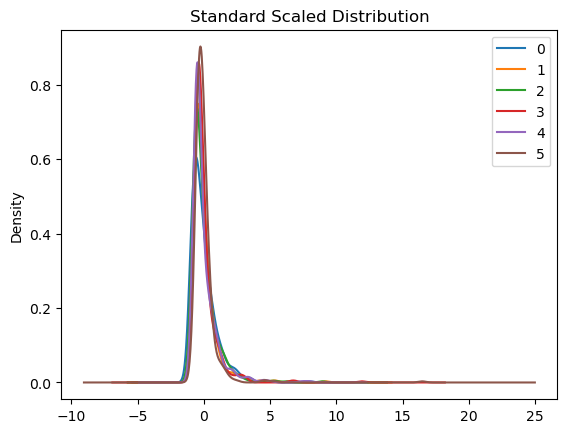

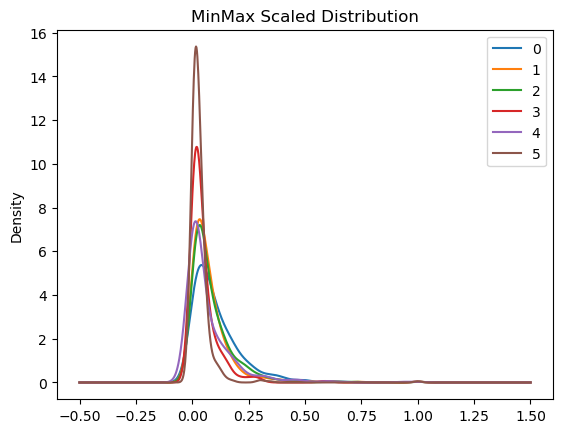

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Feature selection from dataset
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
features = df[features]

target = df['Channel']

pd.DataFrame(features).plot(kind='kde');
plt.title("Original Distribution")

# Standard Scaler
SS_scaled = StandardScaler().fit_transform(features)
SS_scaled[:5]

pd.DataFrame(SS_scaled).plot(kind='kde')
plt.title("Standard Scaled Distribution")

# MinMax Scaler
MM_scaled = MinMaxScaler().fit_transform(features)
MM_scaled[:5]

pd.DataFrame(MM_scaled).plot(kind='kde')
plt.title("MinMax Scaled Distribution")


Both Standard Scaling and MinMax scaling result show it's positevely skewed, heavy-tailed towards right of the distribution. Here, the goal is to best describe the variation in the different types of customers that a wholesale distributor interacts with. MinMax scaler scales the data to a specific range but we're concerned about the customer types and not a range of purchase pattern. In Addition, the features consist of outliers for many important features, hence Standard scaling is appropriate scaling technique.

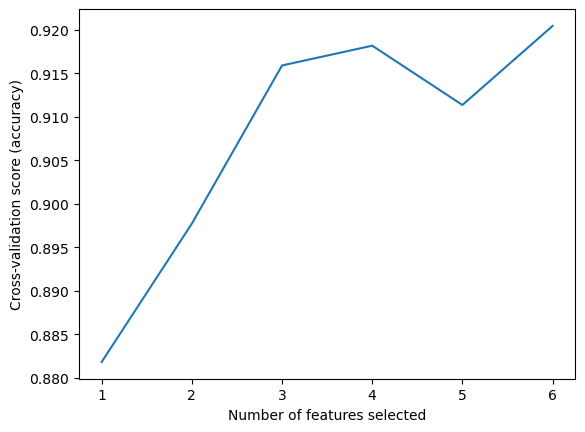

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# RandomForest Classifier and analysis 
estimator = RandomForestClassifier()
rfecv = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(SS_scaled, target)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In this scenario, a Random Forest Classifier with stratified KFold was used, and it was revealed that when the number of features reaches 3, the score reaches 91.5%, as soon as it reaches 4, there is a steady increase in the score, and once it reaches 5, the score drops. When features are configured to 6, the accuracy score slowly improves to 91.2%.

## Implementing K-Mean Clustering

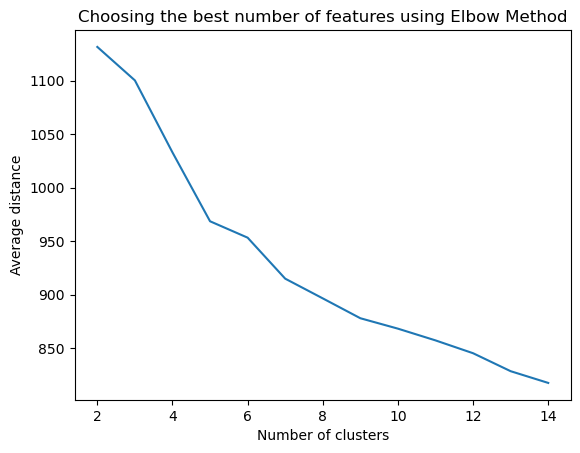

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

# Fit the model to the train set by looping across clusters.
clusters = range(2,15)
cluster_distance = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(SS_scaled)
    clusassign = model.predict(SS_scaled)
    cluster_distance.append(sum(np.min(cdist(SS_scaled, model.cluster_centers_, 'euclidean'), axis=1),SS_scaled.shape[0]))
    
plt.title('Choosing the best number of features using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.plot(clusters, cluster_distance)


After analyzing the KMeans clustering results and examining the elbow curve, it was found that the optimal number of clusters for this problem is 5. The elbow curve showed a clear point where the decrease in inertia significantly slowed down after reaching 5 clusters. This indicates that by dividing the data into 5 clusters, we capture a substantial amount of the variation within the data. Selecting 5 clusters strikes a balance between capturing enough information without creating an excessive number of clusters. It's important to note that this determination was based on the specific dataset and domain knowledge, and other practical considerations and business context should also be taken into account when making a final decision.

## Implement PCA with number of original features

Original shape After Scaling: (440, 6)
Reduced shape After PCA: (440, 5)


Variance explained by the first 2 components: 0.7245929240774498
Variance explained by the first 4 components: 0.9418920905750293


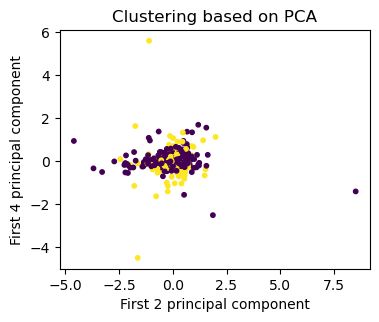

In [11]:
# Perform Principal Component Analysis

pca = PCA(n_components=5)
pca.fit(SS_scaled)
SS_pca = pca.transform(SS_scaled)
print("Original shape After Scaling: {}".format(SS_scaled.shape))
print("Reduced shape After PCA: {}".format(SS_pca.shape))

# Calculate the explained variance by the components
exp_variance_2 = np.sum(pca.explained_variance_ratio_[:2])
exp_variance_4 = np.sum(pca.explained_variance_ratio_[:4])

print("\n")
print("Variance explained by the first 2 components: {}".format(exp_variance_2))
print("Variance explained by the first 4 components: {}".format(exp_variance_4))

plt.figure(figsize=(4, 4))
plt.scatter(SS_pca[:, 2], SS_pca[:, 4], c=target, s=10)
plt.gca().set_aspect("equal")
plt.title('Clustering based on PCA')
plt.xlabel("First 2 principal component")
plt.ylabel("First 4 principal component");

After performing PCA over the scaled features. it was observed that the first 2 and first 4 components does not have a differentiation as far as scatter plot is concerned.  

The variance explained by the first two components is 72%, while the variance explained by the first four components is 94%. The greater the percentage of variation described by the primary components, the more information from the original dataset is retained. In this scenario, the first four components capture a significant amount of the variability in the data, implying that they include crucial information that can be used in subsequent analysis or modeling tasks.

## Model classification

In [12]:
# Import xgboost, KFold, Performance Metrics packages

import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
target = LE.fit_transform(target)

# Implementing the model and evaluating the performance
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
accuracy = cross_val_score(model, SS_scaled, target, cv=kfold, error_score='raise')
precision = np.mean(cross_val_score(model, SS_scaled, target, cv=5, scoring='precision'))
recall = np.mean(cross_val_score(model, SS_scaled, target, cv=5, scoring='recall'))
f1 = np.mean(cross_val_score(model, SS_scaled, target, cv=5, scoring='f1'))

# Print the performance metrics
print ("Accuracy: {}".format(accuracy.mean()))
print ("Precision: {}".format(precision))
print ("Recall: {}".format(recall))
print ("F1-Score: {}".format(f1))

Accuracy: 0.9181818181818182
Precision: 0.8647270114942529
Recall: 0.8945812807881772
F1-Score: 0.878801870251315


In Conclusion, the Standard feature scaling is performed on the dependent variables over Min-Max Scaling. The resultant features are used in XGboost classification model. When tested the model against the test data, it produces an accuracy of approx 92% with precision of 86% and Recall of 89%. F1-Score is recorded to be roughly 88%. In general, the model produced a descent perfomance as it is visible in observation above.